In [2]:
# importing parckages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


4422102/4422102 [==============================] - 1s 0us/step


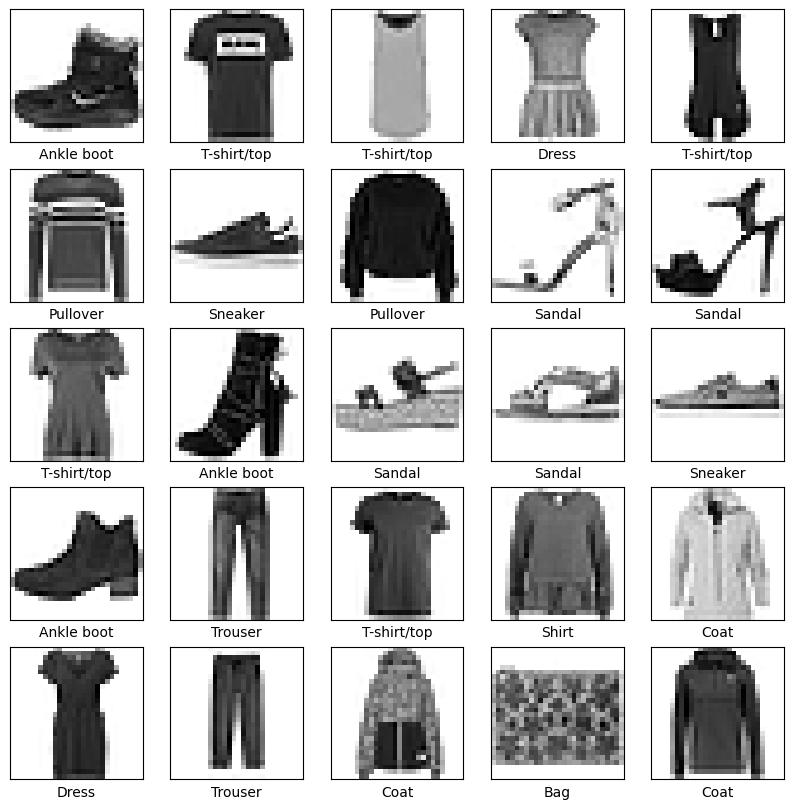

In [3]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Display the first few images and their labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [4]:
# Reshape the data to fit the model input requirements
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


In [5]:
# Convert labels to one-hot vectors
train_labels_one_hot = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = keras.utils.to_categorical(test_labels, num_classes=10)


In [26]:
# Create the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [27]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# Train the model
history = model.fit(train_images, train_labels_one_hot, epochs=8, validation_data=(test_images, test_labels_one_hot))


Epoch 1/8
1875/1875 [==============================] - 69s 36ms/step - loss: 0.4805 - accuracy: 0.8248 - val_loss: 0.3757 - val_accuracy: 0.8665
Epoch 2/8
1875/1875 [==============================] - 69s 37ms/step - loss: 0.3127 - accuracy: 0.8851 - val_loss: 0.3059 - val_accuracy: 0.8882
Epoch 3/8
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2678 - accuracy: 0.9012 - val_loss: 0.2841 - val_accuracy: 0.8977
Epoch 4/8
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2347 - accuracy: 0.9132 - val_loss: 0.3000 - val_accuracy: 0.8873
Epoch 5/8
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2073 - accuracy: 0.9231 - val_loss: 0.2616 - val_accuracy: 0.9060
Epoch 6/8
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1844 - accuracy: 0.9316 - val_loss: 0.2703 - val_accuracy: 0.9017
Epoch 7/8
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1652 - accuracy: 0.9385 - val_loss: 0.2544 - val_ac

In [25]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels_one_hot)

print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 [==============================] - 3s 10ms/step - loss: 2.2997 - accuracy: 0.1042
Test Accuracy: 10.42%
Test Loss: 2.2997


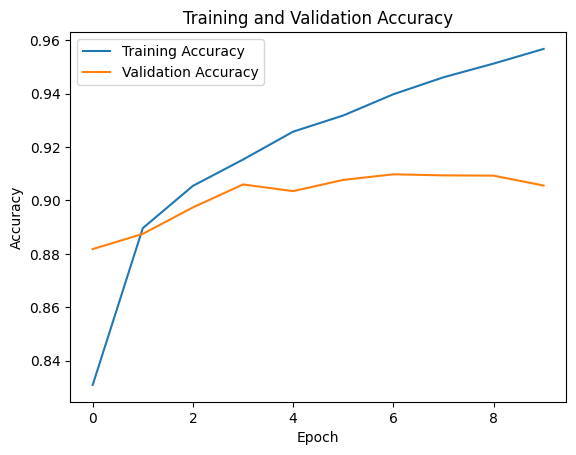

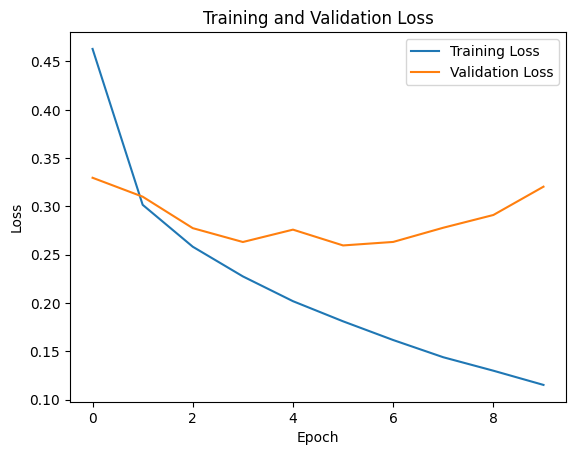

In [13]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 [==============================] - 0s 132ms/step


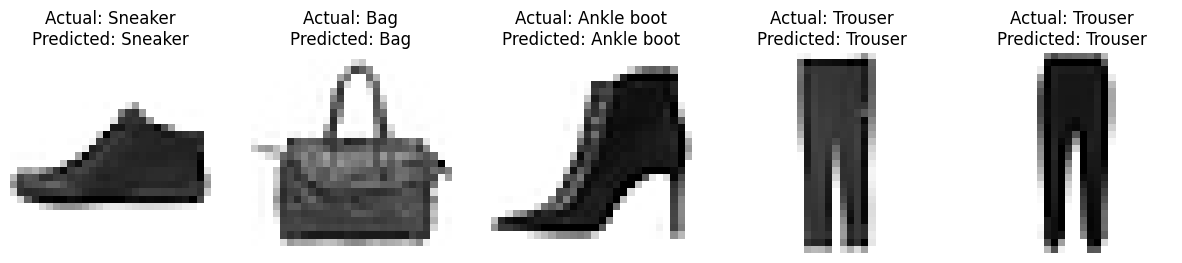

In [11]:
# Make predictions on a subset of the test data
num_samples = 5
sample_indices = np.random.choice(len(test_images), num_samples, replace=False)
sample_images = test_images[sample_indices]
sample_labels_actual = test_labels[sample_indices]

# Predictions
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Display sample images with actual and predicted labels
plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f'Actual: {class_names[sample_labels_actual[i]]}\nPredicted: {class_names[predicted_labels[i]]}')
    plt.axis('off')
plt.show()
